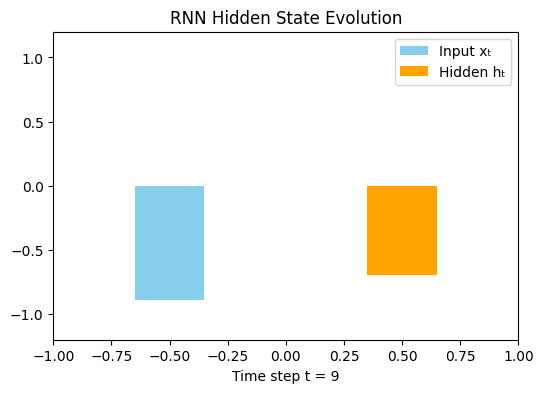

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import PillowWriter

# ----------------------------
# Dummy input sequence
# ----------------------------
T = 10
x = np.random.randn(T)

# RNN parameters
Wx = 0.8
Wh = 0.5
h = 0.0

history = []

for t in range(T):
    h = np.tanh(Wx * x[t] + Wh * h)
    history.append((x[t], h))

# ----------------------------
# Visualization
# ----------------------------
fig, ax = plt.subplots(figsize=(6, 4))
ax.set_xlim(-1, 1)
ax.set_ylim(-1.2, 1.2)

input_bar = ax.bar(-0.5, 0, width=0.3, color="skyblue", label="Input xₜ")
hidden_bar = ax.bar(0.5, 0, width=0.3, color="orange", label="Hidden hₜ")

ax.legend()
ax.set_title("RNN Hidden State Evolution")

writer = PillowWriter(fps=1)

with writer.saving(fig, "gifs/rnn_hidden_state.gif", dpi=80):
    for t, (x_t, h_t) in enumerate(history):
        input_bar[0].set_height(x_t)
        hidden_bar[0].set_height(h_t)
        ax.set_xlabel(f"Time step t = {t}")
        writer.grab_frame()

plt.show()


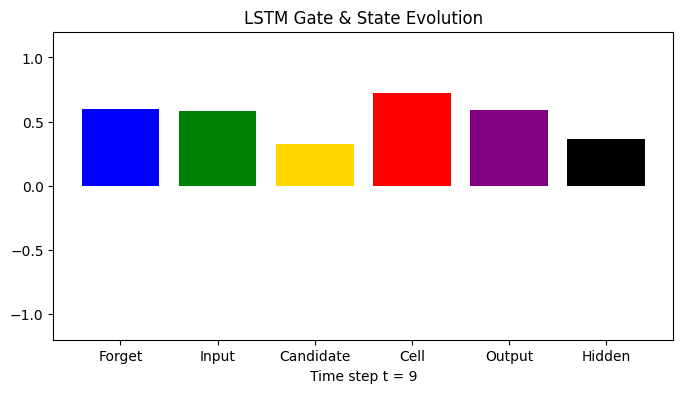

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import PillowWriter

# ----------------------------
# Dummy LSTM sequence
# ----------------------------
T = 10
x = np.random.randn(T)

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

h, c = 0.0, 0.0
history = []

for t in range(T):
    f = sigmoid(0.7 * x[t] + 0.3 * h)      # forget
    i = sigmoid(0.6 * x[t] + 0.2 * h)      # input
    g = np.tanh(0.9 * x[t])                # candidate
    c = f * c + i * g                      # cell state
    o = sigmoid(0.5 * x[t] + 0.4 * h)      # output
    h = o * np.tanh(c)                     # hidden state

    history.append((f, i, g, c, o, h))

# ----------------------------
# Visualization
# ----------------------------
labels = ["Forget", "Input", "Candidate", "Cell", "Output", "Hidden"]
colors = ["blue", "green", "gold", "red", "purple", "black"]

fig, ax = plt.subplots(figsize=(8, 4))
bars = ax.bar(labels, [0]*6, color=colors)

ax.set_ylim(-1.2, 1.2)
ax.set_title("LSTM Gate & State Evolution")

writer = PillowWriter(fps=1)

with writer.saving(fig, "gifs/lstm_gates.gif", dpi=80):
    for t, vals in enumerate(history):
        for bar, val in zip(bars, vals):
            bar.set_height(val)
        ax.set_xlabel(f"Time step t = {t}")
        writer.grab_frame()

plt.show()

